# Modules

In [10]:
import sys
sys.path.insert(0, '../..')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# eil51 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [11]:

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    time1 = time.time()
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
        time2 = time.time()
        if time2 - time1 > 5:
            break
    return route # When the route is no longer improving substantially, stop searching and return the route.

In [12]:
with open('../../data/eil51_json_array.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')
data = eval(data)
data = np.array(data)
data[:5]

array([[37, 52],
       [49, 49],
       [52, 64],
       [20, 26],
       [40, 30]])

In [13]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  2.864670753479004


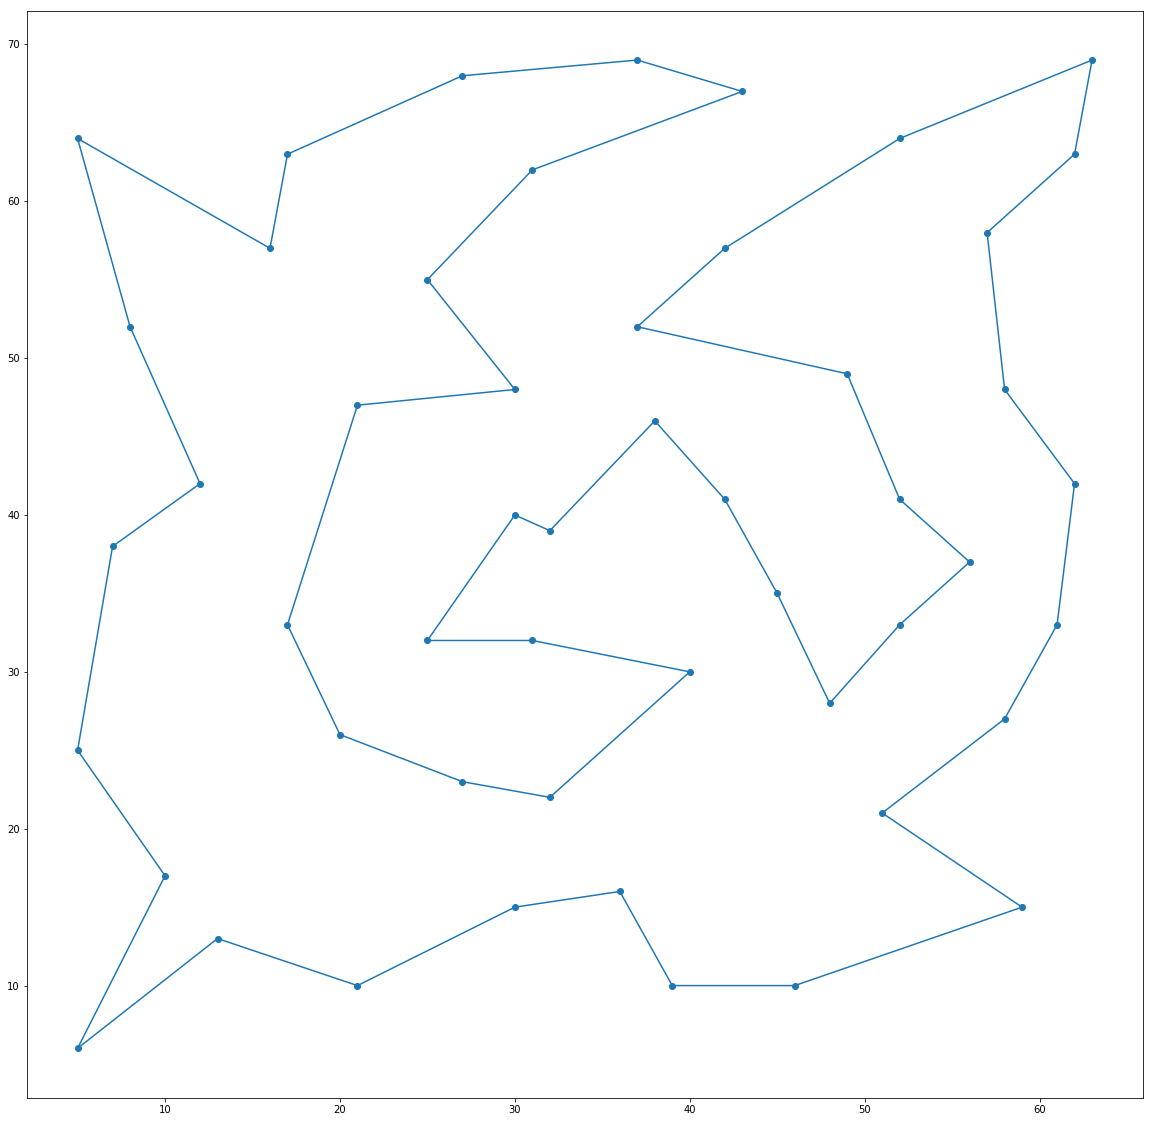

Route: [ 0 21  2 35 34 19 28 20 33 29  9 38 32 44 14 43 41 18 39 40 12 24 13 23 42
 22  6 25 30 27  7 47 26  5 17  3 16 36  4 11 46 50 45 31 10 37 48  8 49 15
  1]

Distance: 452.384569848


In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data[route[i]] for i in range(len(route))]),np.array([data[0]])))
# Plot the cities.
plt.scatter(data[:,0],data[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data)))

In [17]:
data[:5]

array([[37, 52],
       [49, 49],
       [52, 64],
       [20, 26],
       [40, 30]])

# berlin52 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [10]:
with open('../../data/berlin52_array.txt', 'r') as myfile:
    data_2=myfile.read().replace('\n', '')
data_2 = eval(data_2)
data_2 = np.array(data_2)
data_2[:5]

array([[  25.,  185.],
       [ 345.,  750.],
       [ 945.,  685.],
       [ 845.,  655.],
       [ 880.,  660.]])

In [11]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_2,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  2.7973718643188477


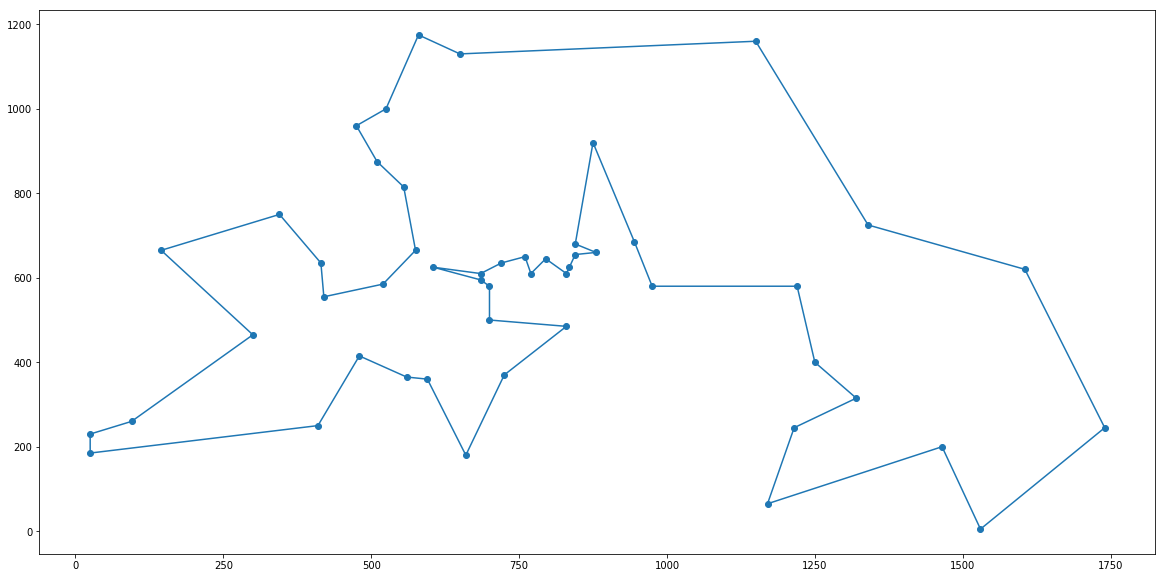

Route: [ 0 28 21 18 48 27 14 44 42 32 33 47 34 37 38 35 36 46 22  3  4 13 41  2 23
 10 26 25 24 45 11 12 50  9 49 31  8  7  6 39 17 43 30 20 29 16  1 15 19 40
  5]

Distance: 7889.06356722


In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_2[route[i]] for i in range(len(route))]),np.array([data_2[0]])))
# Plot the cities.
plt.scatter(data_2[:,0],data_2[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_2)))

# pr76 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [14]:
with open('../../data/pr76_array.txt', 'r') as myfile:
    data_3=myfile.read().replace('\n', '')
data_3 = eval(data_3)
data_3 = np.array(data_3)
data_3[:5]

array([[3100, 3300],
       [4700, 5750],
       [5400, 5750],
       [5608, 7103],
       [4493, 7102]])

In [15]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_3,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  10.025209665298462


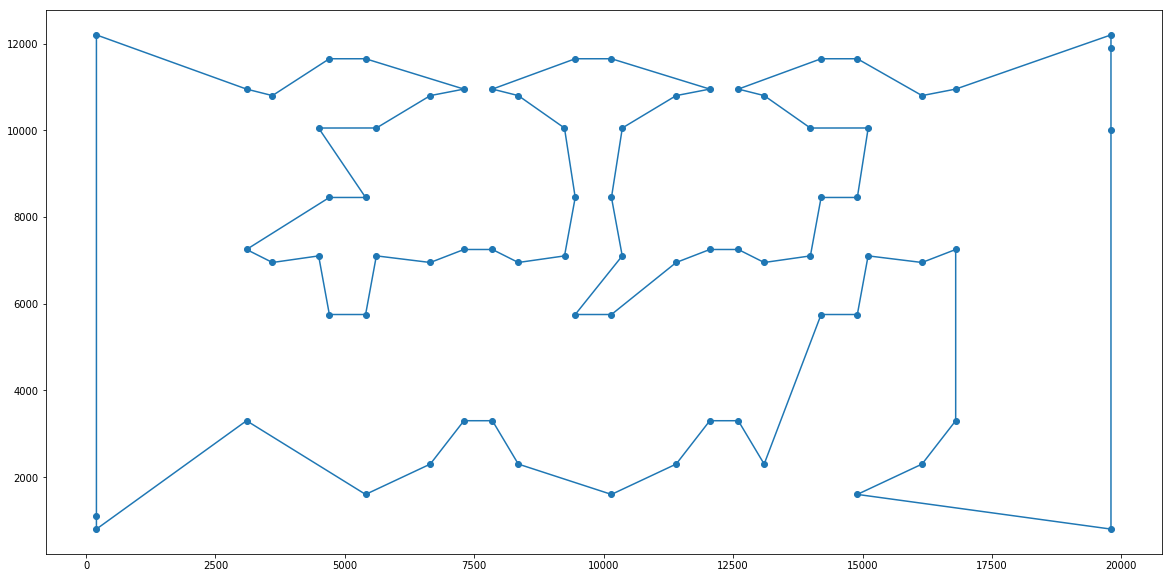

Route: [ 0 21 20 19 23 22 44 43 42 46 45 47 48 49 64 63 65 66 67 68 69 70 71 62 61
 60 59 58 57 56 55 54 53 50 51 52 40 41 25 24 26 31 32 38 39 37 36 35 34 33
 30 27 28 29 17 18  3  2  1  4  5  6  7  8 10  9 15 16 14 13 11 12 72 73 74]

Distance: 118382.452561


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_3[route[i]] for i in range(len(route))]),np.array([data_3[0]])))
# Plot the cities.
plt.scatter(data_3[:,0],data_3[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_3)))

# eil101 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM


In [17]:
with open('../../data/eil101_array.txt', 'r') as myfile:
    data_4=myfile.read().replace('\n', '')
data_4 = eval(data_4)
data_4 = np.array(data_4)
data_4[:5]

array([[35, 17],
       [55, 45],
       [55, 20],
       [15, 30],
       [25, 30]])

In [18]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_4,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  11.88314700126648


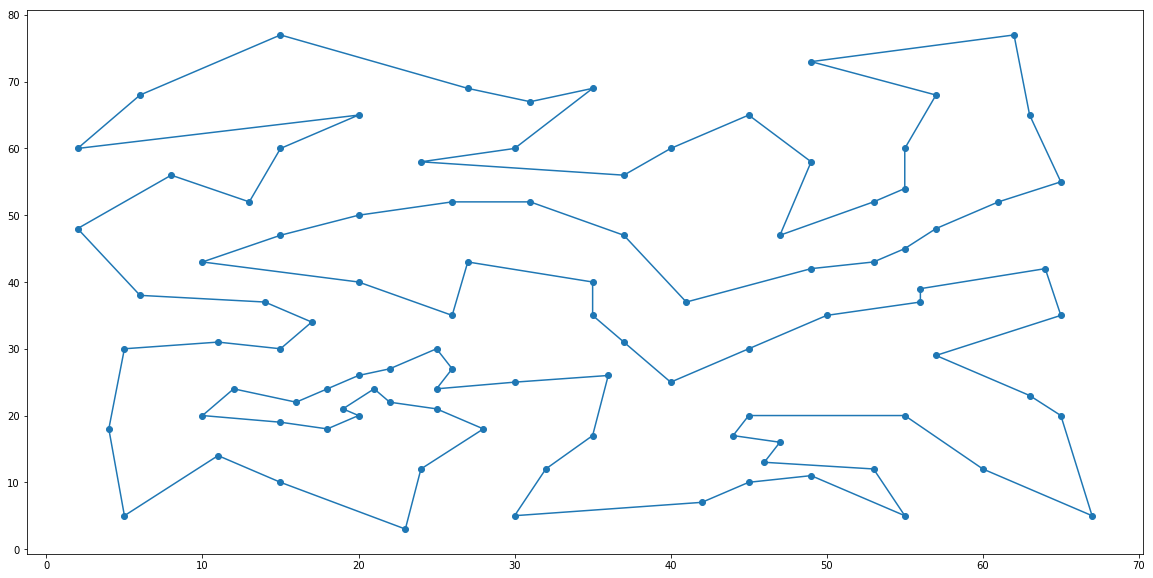

Route: [ 0 55 13 39 20 73 21 54 72 70 71 19  2 37 65 23 53 52 22 27 66 78 10 24 38
 51 99 25 50 87 16  6 80  5 86 29 67 26 74 75  1 77 76 32 33 63 64 69  7 79
 31 48 49 18 28 68 60  8 30 88 61 62 47 34  9 17 46 45 44 43 81 58  3 82 15
 84 36 42 12 41 40 85 95 90 57 96 35 98 89 14 59 83 91 97 94  4 92 93 11 56]

Distance: 700.711522636


In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_4[route[i]] for i in range(len(route))]),np.array([data_4[0]])))
# Plot the cities.
plt.scatter(data_4[:,0],data_4[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_4)))

# ch150 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [21]:
with open('../../data/ch150_array.txt', 'r') as myfile:
    data_5=myfile.read().replace('\n', '')
data_5 = eval(data_5)
data_5 = np.array(data_5)
data_5[:5]

array([[ 612.17595086,  494.31668774],
       [  38.13123382,  353.14845818],
       [  53.44180811,  131.48490137],
       [ 143.06063553,  631.72009539],
       [ 689.94512673,  468.53549987]])

In [22]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_5,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  70.13456320762634


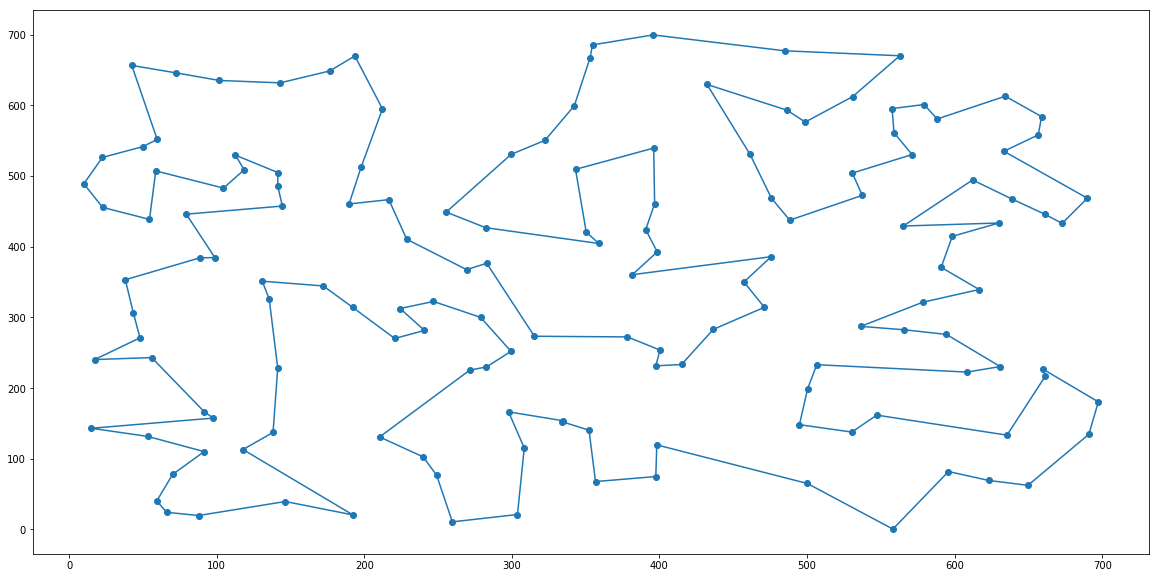

Route: [  0  35   7  26   4  17  97 112 100 106  68 133  84  27  79 108  18  23
 139  63  53  56  48 135 130  83 140  16  73  24 144 124  31  52  90  54
  81  88  44 136 132  49 107  41  65  36  21  30 129  75 103 109  50  91
  33 122  95 141  98   3 105  93  80 101  96  85  74  71  46  32  28  82
   5   6  87  94  61   8 111   1  60 147  20 123 148 113 102   2  43 126
  66 117  89 104  11  69  42  19  86  92 119  77  76  13  57  14 131 120
  12  78  62 110 134  72 121 143  70  47 145 142  29  25 127 115 138  58
  64  15 146   9  34  59 128  37  55  39  99 114 125  67 116  22  10  51
  38 137 118  40  45]

Distance: 7258.27168567


In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_5[route[i]] for i in range(len(route))]),np.array([data_5[0]])))
# Plot the cities.
plt.scatter(data_5[:,0],data_5[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_5)))

# a280 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [24]:
with open('../../data/a280_array.txt', 'r') as myfile:
    data_6=myfile.read().replace('\n', '')
data_6 = eval(data_6)
data_6 = np.array(data_6)
data_6[:5]

array([[288, 129],
       [270, 133],
       [256, 141],
       [256, 157],
       [246, 157]])

In [25]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_6,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  349.0076410770416


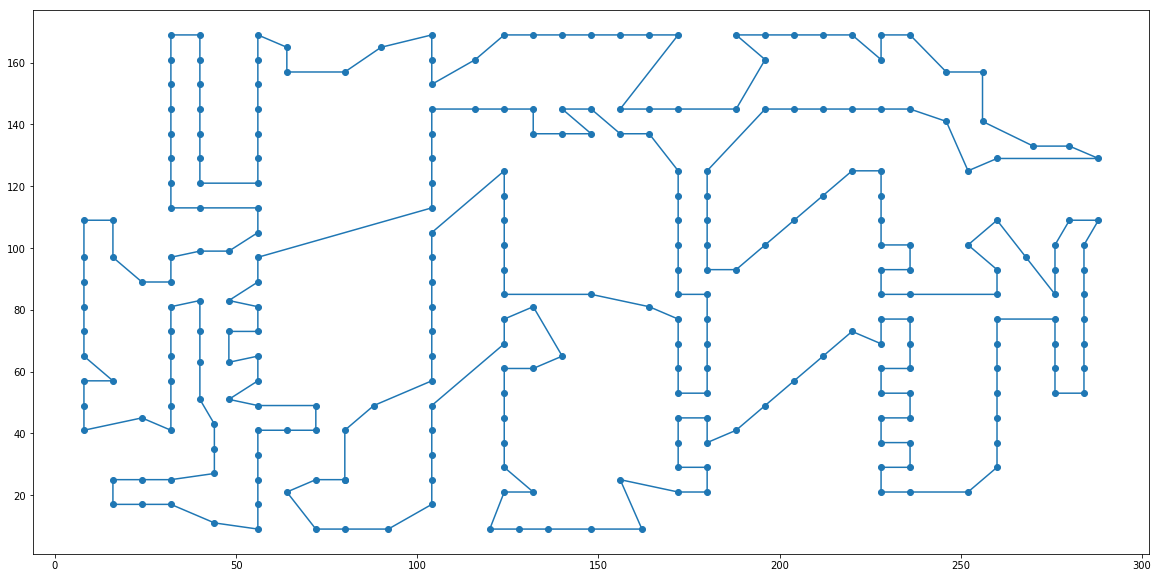

Route: [  0 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261
 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243
 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225
 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207
 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189
 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 158 157 156 155 117 118
 152 153 151 154 150 149 148 147 146 145 144 143 142 141 140 139 138 137
 136 135 134 133 132 131 130  18  19 129 128 127 126 125 124 123 122 121
 120 119 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101
 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  73  74  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_6[route[i]] for i in range(len(route))]),np.array([data_6[0]])))
# Plot the cities.
plt.scatter(data_6[:,0],data_6[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_6)))

# Optimal Solution , According to Heidelberg

In [54]:
data_set_name_list = ['att48','berlin52','pr76','eil101','ch150','a280']
# https://www.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/STSP.html
# optimum solutions' distances are taken from this website
# list are created respect to data_set_name_list
number_of_cities = [48,52,76,101,150,280]
optimum_distance_solution_list = [10628,7542,108159,629,6528,2579]
two_opt_algorithm_solution_list = [35955.04,7889.06,118382.45,700.71,7258.27,2755.53]
two_opt_algorithm_execution_time_list = [1.71,2.79,10.02,11.88,70.13,349.00]

In [55]:
result_table = {'Dataset Name':data_set_name_list,
                'Number of Cities':number_of_cities,
                'Distance of Optimum Tour':optimum_distance_solution_list,
                'Distance of 2-opt Algorithm Tour':two_opt_algorithm_solution_list,
                'Execution Time (Seconds)':two_opt_algorithm_execution_time_list}

In [56]:
result_df = pd.DataFrame(data=result_table)
result_df['Percentage Error'] = np.nan

In [57]:
for i in range(6):
    result_df['Percentage Error'][i] = (1 - (result_df['Distance of Optimum Tour'][i]/result_df['Distance of 2-opt Algorithm Tour'][i]))*100

C:\Users\orhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
result_df

,Dataset Name,Distance of 2-opt Algorithm Tour,Distance of Optimum Tour,Execution Time (Seconds),Number of Cities,Percentage Error
0,att48,35955.04,10628,1.71,48,70.440862
1,berlin52,7889.06,7542,2.79,52,4.399257
2,pr76,118382.45,108159,10.02,76,8.635951
3,eil101,700.71,629,11.88,101,10.233906
4,ch150,7258.27,6528,70.13,150,10.061213
5,a280,2755.53,2579,349.00,280,6.406390


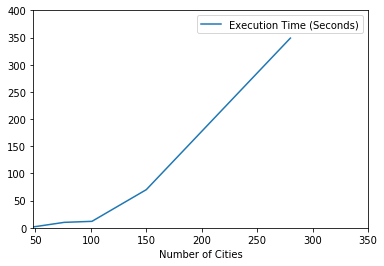

In [73]:
data = pd.concat([result_df['Execution Time (Seconds)'], result_df['Number of Cities']], axis=1)
data.plot.line(x='Number of Cities', y='Execution Time (Seconds)',xlim=(48,350), ylim=(0,400));

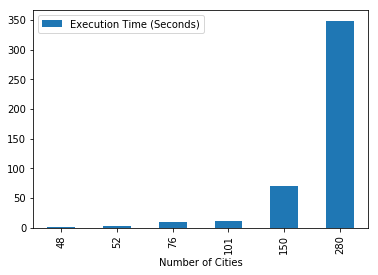

In [77]:
data = pd.concat([result_df['Execution Time (Seconds)'], result_df['Number of Cities']], axis=1)
data.plot.bar(x='Number of Cities', y='Execution Time (Seconds)');